<a href="https://colab.research.google.com/github/Akhay-Kumar/Machine-Learning-ML/blob/main/Clustering_Algorithm_A_Comparative_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
#Clustering Algorithm: A Comparative Study
*Akshay Kumar*
***

In [ ]:
# Importing Library
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# Importing the dataset
dt = pd.read_csv('/content/Aggregation.txt', header=None, delim_whitespace=True)

In [ ]:
# Extracting Independent Variables
X = dt.to_numpy()
np.delete(X, 2, 1)
y = dt.to_numpy()
y = y[:,2]

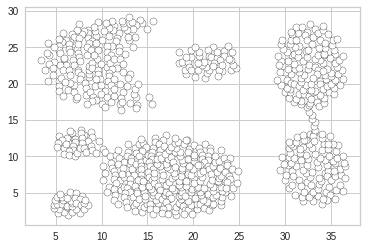

In [ ]:
# Plot the data
plt.scatter(
   dt[0], dt[1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

# Partitioning methods
*K-Means*

In [ ]:
def plot_centroids(km_model):
    plt.scatter(
    km_model.cluster_centers_[:, 0], km_model.cluster_centers_[:, 1],
    s=150, marker='o',
    c='red', edgecolor='black',
    label='centroids')

def plot_clusters(k, km_pred_values):
    for x in range(k):
        clustername = "cluster " + str(x)
        plt.scatter(
            X[km_pred_values == x, 0], X[km_pred_values == x, 1],
            s=50, c=np.random.rand(3,),
            marker='x', edgecolor='black',
            label= clustername)    


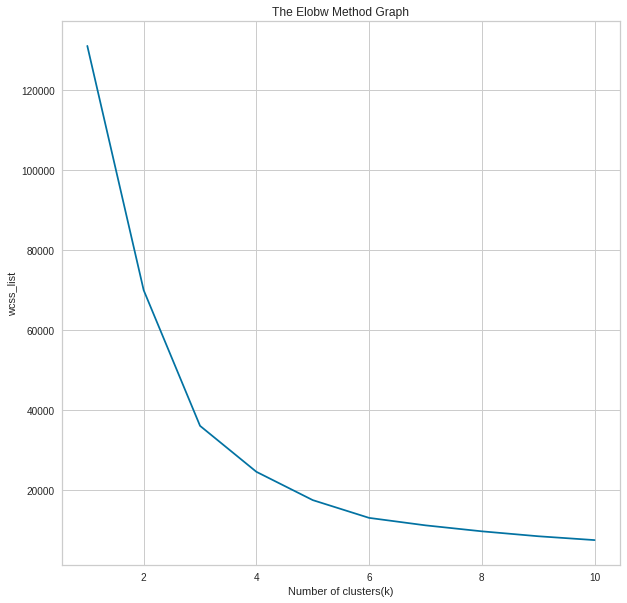

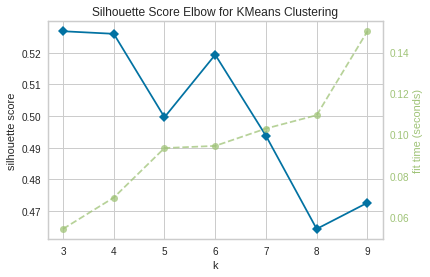

In [ ]:
# Choice of optimal k
wcss_list= []  #Initializing the list for the values of WCSS  
#Using for loop for iterations from 1 to 10.  
plt.figure(figsize=(10,10))
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(X)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show() 

km = KMeans()
visualizer = KElbowVisualizer(km, k = (3,10), locate_elbow=True, metric = 'silhouette')
visualizer.fit(X)
visualizer.poof()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

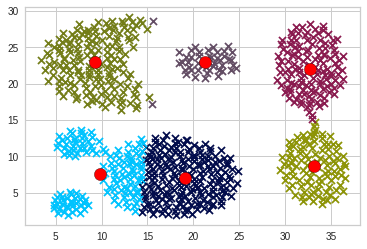

0.5176252024691022


In [ ]:
# K = 6
km = KMeans(n_clusters=6, init='random',
           n_init=10, max_iter=300,
            tol=1e-04, random_state=0)

km_predict = km.fit_predict(X)
# plot graph
plot_clusters(6, km_predict)
plot_centroids(km)
plt.show()
# Model evaluation
print(silhouette_score(X, km.labels_, metric = 'euclidean'))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

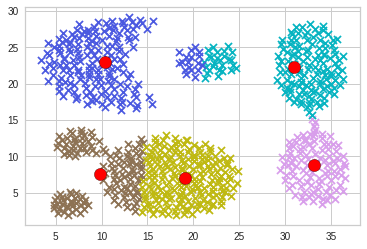

0.4996440610783604


In [ ]:
# K = 5
km5 = KMeans(n_clusters=5, init='random',
           n_init=10, max_iter=300,
            tol=1e-04, random_state=0)

km5_predict = km5.fit_predict(X)
# plot graph
plot_clusters(5, km5_predict)
plot_centroids(km5)
plt.show()
# Model evaluation
print(silhouette_score(X, km5.labels_, metric = 'euclidean'))

In [ ]:
#Calculation of the rand index in comparison to the ground truth
adjusted_rand_score(y, km.labels_)

0.794982256654018

# Hierarchical Clustering
*Agglomerative*

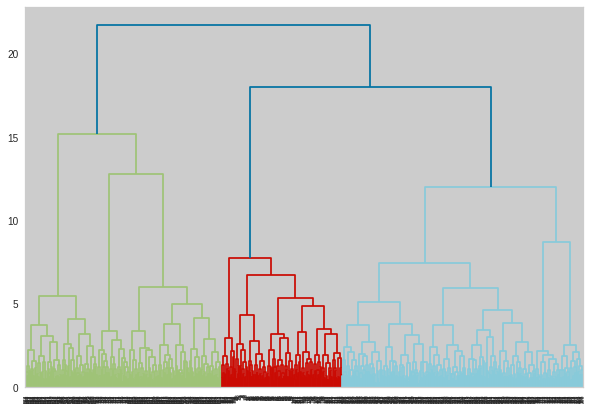

0.9890800596977944

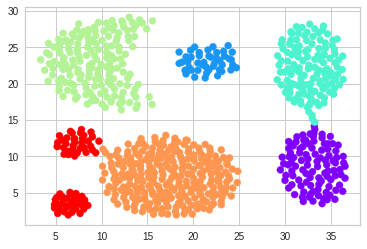

In [ ]:
linked = linkage(X, 'average')
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()
labels = fcluster(linked, 10, criterion='distance')
plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow')

#Calculation of the rand index in comparison to the ground truth
adjusted_rand_score(y, labels)

**Balanced Iterative Reducing and Clustering using Hierarchies (BIRCH)**

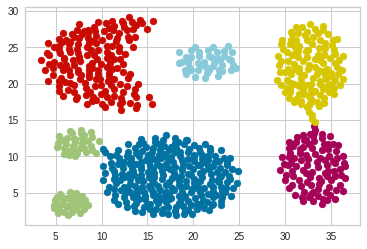

In [ ]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import Birch
from matplotlib import pyplot
# define the model
model = Birch(threshold=0.01, n_clusters=6)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

# Density-based clusters
**DBSCAN Clustering**
(where DBSCAN is short for Density-Based Spatial Clustering of Applications with Noise)

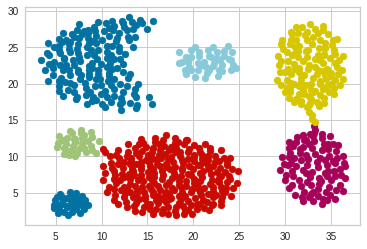

In [ ]:
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
# define the model
model = DBSCAN(eps=2.8, min_samples=15)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

**OPTICS clustering** 
(where OPTICS is short for Ordering Points To Identify the Clustering Structure) 

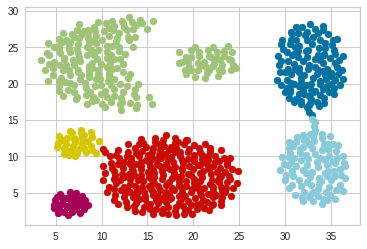

0.9835194816806785

In [ ]:
# optics clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import OPTICS
from matplotlib import pyplot
# define the model
model = OPTICS(eps=20, min_samples=20)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()
#Calculation of the rand index in comparison to the ground truth
adjusted_rand_score(yhat, labels)